C-to-Python
===

The traditonal way to extend Python with C code

The code below uses:
* [ctypes](https://docs.python.org/3/library/ctypes.html)
* [numpy](https://numpy.org/)
* [Pillow](https://pypi.org/project/Pillow/)

This directory contains a Python module mypylib.py and identical code in C/C++ in mylib.cpp(h).  Look over the code before you begin.  And type *make* to build the C/C++ libraries for this example.  Two versions of the shared library are built, one with C-style linkage mylib.soc and one with C++ style linkage mylib.so.

In [11]:
import mypylib
import numpy as np

We'll first measure the time of Python code with our findPi function.  We use 100M random numbers thrown in a unit square to estimate the value of pi.

In [14]:
%time mypylib.findPi(100*1000*1000)

CPU times: user 12.8 s, sys: 0 ns, total: 12.8 s
Wall time: 12.8 s


3.14179904

We'll begin with a pure python example to draw the [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set).

In [4]:
npX=2000
npY=2000

img=np.ndarray(shape=(npX,npY), dtype=np.double)
%time mypylib.mandel(img,-2.1,0.6,-1.5,1.5,npX,npY)

CPU times: user 11.9 s, sys: 67.2 ms, total: 12 s
Wall time: 12.1 s


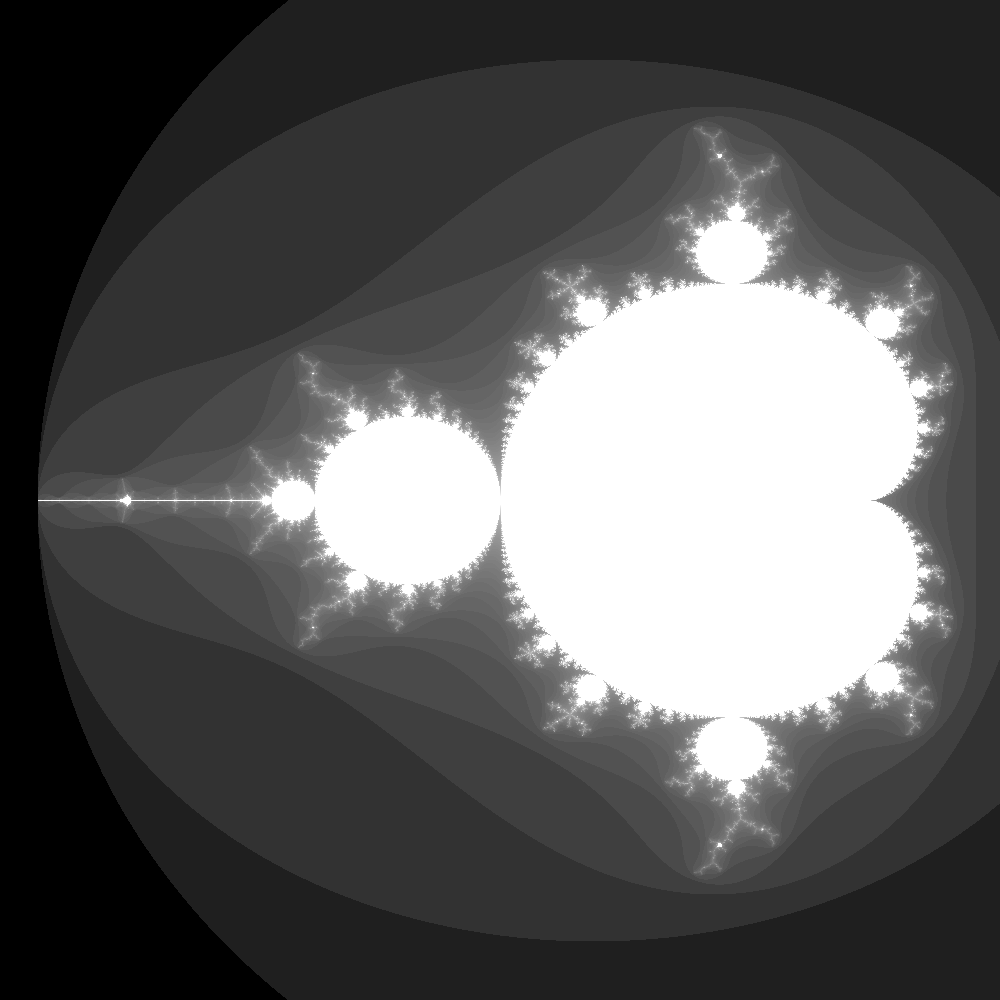

In [3]:
from PIL import Image

# convert values to 0 - 255 int8 format
img=np.log(img)
img = (img/img.max()*255).astype('uint8')
image = Image.fromarray(img)

display(image)

Our fist step if to create a shared library with C linkage

In [5]:
from ctypes import cdll  # pythonic interfaces for C(++) libraries
from ctypes import c_double
from ctypes import c_long
from ctypes import c_int
from ctypes import POINTER
import numpy as np

In [7]:
# load our library and define the input/output interfaces
myclib=cdll.LoadLibrary('./mylib.soc')

In [8]:
myclib.mandel.argtypes = [POINTER(c_double), c_double, c_double, c_double, c_double, c_int, c_int]
myclib.mandel.restype=None

In [10]:
npX=1000
npY=1000

img=np.ndarray(shape=(npX,npY), dtype=np.double)
%time myclib.mandel(img.ctypes.data_as(POINTER(c_double)),-2.1,0.6,-1.5,1.5,npX,npY)

CPU times: user 5.28 ms, sys: 9 µs, total: 5.29 ms
Wall time: 4.57 ms


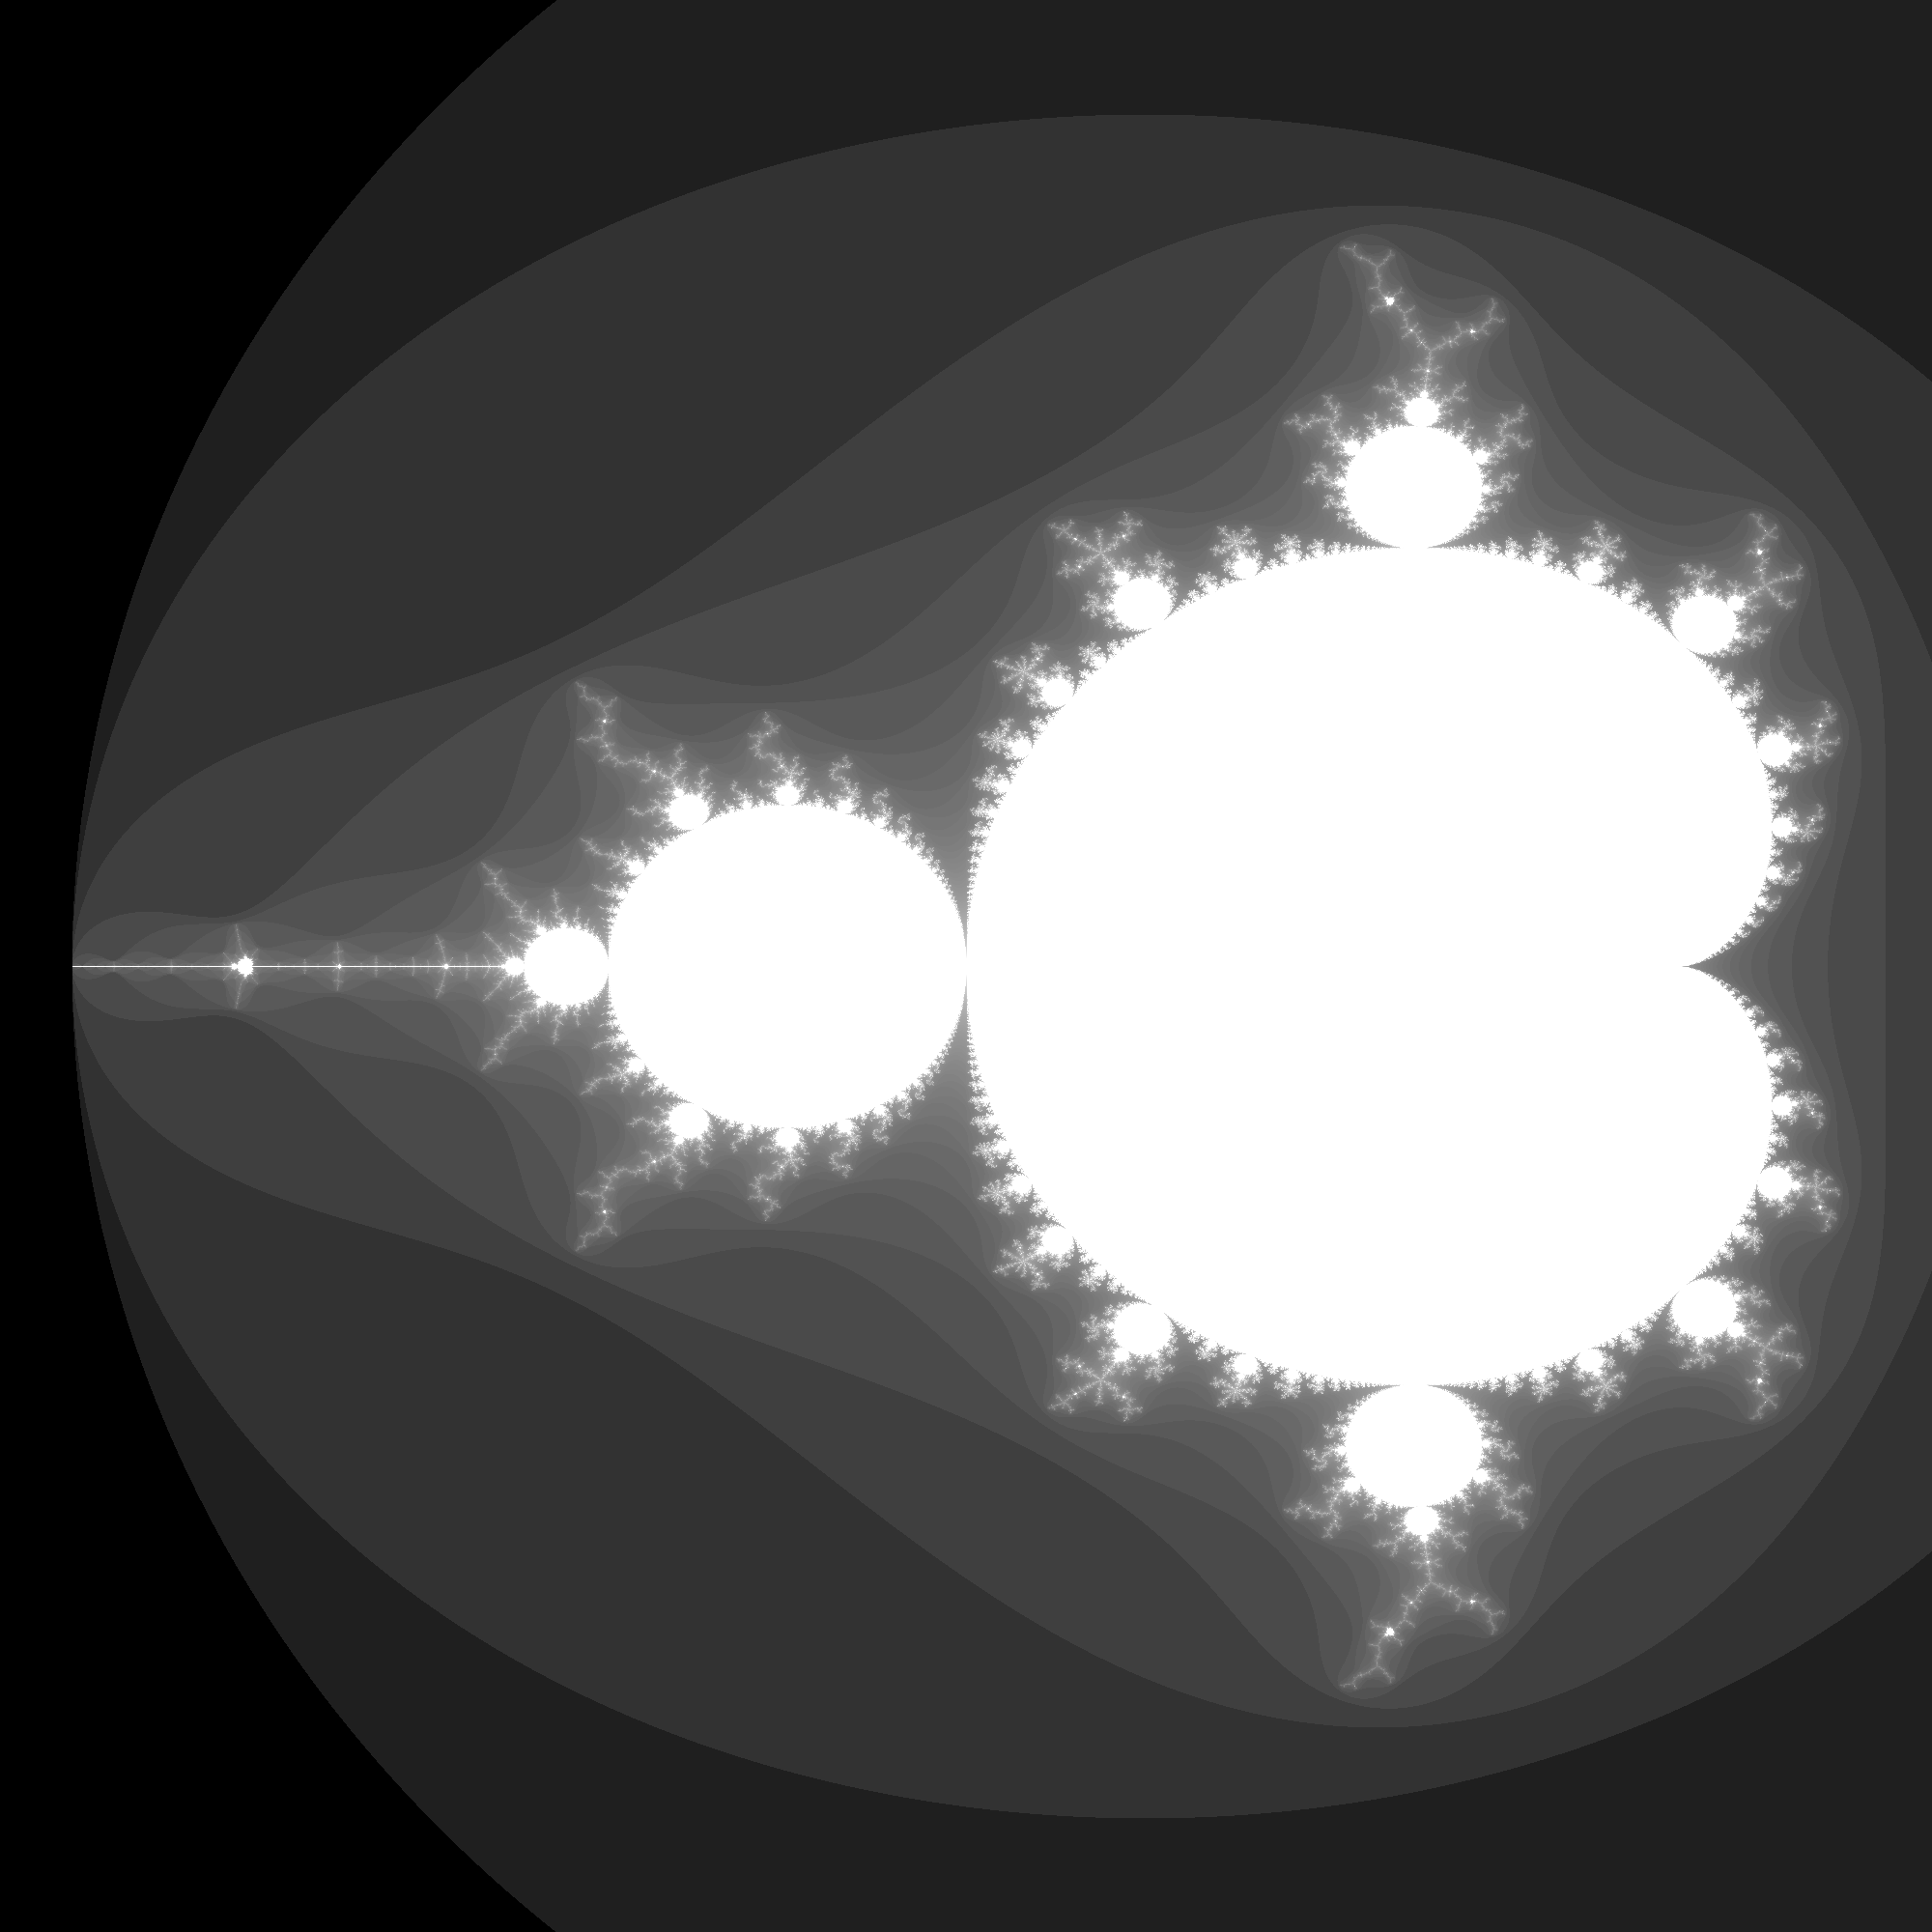

In [9]:
from PIL import Image

# convert values to 0 - 255 int8 format
img=np.log(img)
img = (img/img.max()*255).astype('uint8')
image = Image.fromarray(img)

display(image)

#image = Image.fromarray(img)
#img

In [ ]:
%%timeit -n1 -r1 
myclib.findPi(100*1000*1000)

In [ ]:
from mypylib import findPi

In [ ]:
%%timeit -n1 -r1 
findPi(100*1000*1000)

In [ ]:
import ROOT as r

In [ ]:
import numpy as np

In [ ]:
subdivision = 5
step = 1.0/subdivision
grid= np.mgrid[ step-1 : 1.0: step * 2,
                step-1 : 1.0: step * 2]

In [ ]:
grid[0,0]

In [ ]:
a=np.ones((3, 5))

In [ ]:
a[0][0]

In [ ]:
img=np.ndarray(shape=(100,100), dtype=float, order='F')

In [ ]:
img.ctypes.data

// Interface for out Mandelbrot set calculator
void mandel(double *img, double re1, double re2, double im1, double im2,
	    int nr, int nc);

In [4]:
myclib.mandel.argtypes = [c_double, c_double, c_double, c_double, c_int, c_int]
myclib.mandel.restype=None

In [28]:
#myclib.findPi.argtypes=[c_long]    # input data type[s]
#myclib.findPi.restype=c_double     # return value type
myclib.mandel(img.ctypes.data,-2,2-2,2,100,100)

AttributeError: ./mylib.soc: undefined symbol: mandel

In [59]:
img = Image.new('RGB', (100, 100), color = 'black')
pixels = img.load()

In [60]:
type(pixels)

PixelAccess

In [12]:
import ROOT as r

Welcome to JupyROOT 6.24/02


In [13]:
import cppyy